# Feature Engineering:
Taking whatever information you have and turning them into numbers that you can use to build your feature matrix

## Categorical Features

In [63]:
data = [
    {'Age': 45, 'Height': '122', 'Kind': 'Dog'},
    {'Age': 45, 'Height': '122', 'Kind': 'Cat'},
    {'Age': 45, 'Height': '122', 'Kind': 'Dog'},
    {'Age': 45, 'Height': 122, 'Kind': 'Dog'},
    {'Age': 45, 'Height': 122, 'Kind': 'Monkey'},
    {'Age': 45, 'Height': 122, 'Kind': 'Cat'},
]

In [64]:
from sklearn.feature_extraction import DictVectorizer

In [65]:
vac = DictVectorizer(sparse= False, dtype= int)

In [66]:
transfored = vac.fit_transform(data)

In [67]:
transfored

array([[ 45,   0,   1,   0,   1,   0],
       [ 45,   0,   1,   1,   0,   0],
       [ 45,   0,   1,   0,   1,   0],
       [ 45, 122,   0,   0,   1,   0],
       [ 45, 122,   0,   0,   0,   1],
       [ 45, 122,   0,   1,   0,   0]])

In [68]:
pd.DataFrame(transfored, columns=[vac.get_feature_names()])

,Age,Height,Height=122,Kind=Cat,Kind=Dog,Kind=Monkey
0,45,0,1,0,1,0
1,45,0,1,1,0,0
2,45,0,1,0,1,0
3,45,122,0,0,1,0
4,45,122,0,0,0,1
5,45,122,0,1,0,0


#### It was sparse = False

In [69]:
vac = DictVectorizer(sparse= True, dtype= int)

In [70]:
vac.fit_transform(data)

<6x6 sparse matrix of type '<class 'numpy.int32'>'
	with 18 stored elements in Compressed Sparse Row format>

In [71]:
transformed = vac.fit_transform(data)

In [76]:
print(transformed)

  (0, 0)	45
  (0, 2)	1
  (0, 4)	1
  (1, 0)	45
  (1, 2)	1
  (1, 3)	1
  (2, 0)	45
  (2, 2)	1
  (2, 4)	1
  (3, 0)	45
  (3, 1)	122
  (3, 4)	1
  (4, 0)	45
  (4, 1)	122
  (4, 5)	1
  (5, 0)	45
  (5, 1)	122
  (5, 3)	1


In [72]:
transformed.todense()

matrix([[ 45,   0,   1,   0,   1,   0],
        [ 45,   0,   1,   1,   0,   0],
        [ 45,   0,   1,   0,   1,   0],
        [ 45, 122,   0,   0,   1,   0],
        [ 45, 122,   0,   0,   0,   1],
        [ 45, 122,   0,   1,   0,   0]])

In [73]:
transformed.toarray()

array([[ 45,   0,   1,   0,   1,   0],
       [ 45,   0,   1,   1,   0,   0],
       [ 45,   0,   1,   0,   1,   0],
       [ 45, 122,   0,   0,   1,   0],
       [ 45, 122,   0,   0,   0,   1],
       [ 45, 122,   0,   1,   0,   0]])

### Text Fetures

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
vec = CountVectorizer()

In [79]:
data = ['Aayush shah is the amazing person on the planet',
        'He has got braing and amazing things to do',
        'Aayush has many plans and he will surely execute them to the success',
       'I know, I believe, Aayush will do it.']

In [82]:
tran = vec.fit_transform(data)
tran

<4x26 sparse matrix of type '<class 'numpy.int64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [83]:
print(tran)

  (0, 0)	1
  (0, 18)	1
  (0, 10)	1
  (0, 21)	2
  (0, 1)	1
  (0, 15)	1
  (0, 14)	1
  (0, 16)	1
  (1, 1)	1
  (1, 9)	1
  (1, 8)	1
  (1, 7)	1
  (1, 4)	1
  (1, 2)	1
  (1, 23)	1
  (1, 24)	1
  (1, 5)	1
  (2, 0)	1
  (2, 21)	1
  (2, 9)	1
  (2, 8)	1
  (2, 2)	1
  (2, 24)	1
  (2, 13)	1
  (2, 17)	1
  (2, 25)	1
  (2, 20)	1
  (2, 6)	1
  (2, 22)	1
  (2, 19)	1
  (3, 0)	1
  (3, 5)	1
  (3, 25)	1
  (3, 12)	1
  (3, 3)	1
  (3, 11)	1


In [87]:
turned = pd.DataFrame(tran.toarray(), columns= vec.get_feature_names())
turned

,aayush,amazing,and,believe,braing,do,execute,got,has,he,...,planet,plans,shah,success,surely,the,them,things,to,will
0,1,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,2,0,0,0,0
1,0,1,1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,1,1,0
2,1,0,1,0,0,0,1,0,1,1,...,0,1,0,1,1,1,1,0,1,1
3,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### It is basically counting the words. But see, how much space does it require to store the counts!

## Second approach

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
vec = TfidfVectorizer()

In [92]:
tran = vec.fit_transform(data)
tran

<4x26 sparse matrix of type '<class 'numpy.float64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [94]:
turned = pd.DataFrame(tran.toarray(), columns= vec.get_feature_names())
turned

,aayush,amazing,and,believe,braing,do,execute,got,has,he,...,planet,plans,shah,success,surely,the,them,things,to,will
0,0.218733,0.270179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.342687,0.000000,0.342687,0.000000,0.000000,0.540357,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.303920,0.303920,0.000000,0.385484,0.303920,0.000000,0.385484,0.303920,0.303920,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.385484,0.303920,0.000000
2,0.200476,0.000000,0.247628,0.000000,0.000000,0.000000,0.314084,0.000000,0.247628,0.247628,...,0.000000,0.314084,0.000000,0.314084,0.314084,0.247628,0.314084,0.000000,0.247628,0.247628
3,0.295980,0.000000,0.000000,0.463709,0.000000,0.365594,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.365594


### Polynomial Features

#### Data always can't be described by the straight line...

In [99]:
import matplotlib.pyplot as plt
import numpy as np

In [135]:
x = np.array([1,2.4,3,4,5])
y = np.array([5,3,1.5,3,4])

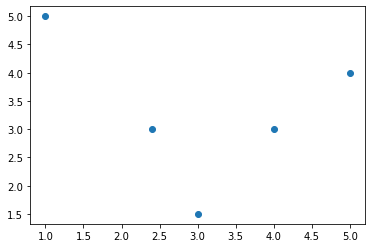

In [136]:
plt.plot(x, y, 'o')

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
model = LinearRegression()

In [139]:
model.fit(x[:, np.newaxis], y)

LinearRegression()

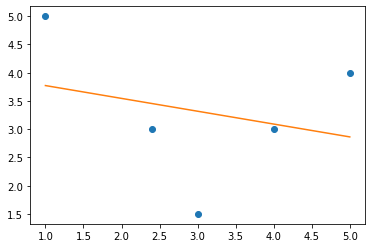

In [140]:
plt.plot(x, y, 'o')
plt.plot(x, model.predict(x[:, np.newaxis]))

#### Can be done with Plynomial Features.

What that means is that, some times becaues of the limited features, we can not plot the line in a nice way, so **we need to add `more features`** to get the best fitting line.

In [141]:
from sklearn.preprocessing import PolynomialFeatures

In [189]:
poly = PolynomialFeatures(degree= 3, include_bias= False)

In [190]:
poly

PolynomialFeatures(degree=3, include_bias=False)

In [191]:
X = poly.fit_transform(x[:, np.newaxis])

In [192]:
X

array([[  1.   ,   1.   ,   1.   ],
       [  2.4  ,   5.76 ,  13.824],
       [  3.   ,   9.   ,  27.   ],
       [  4.   ,  16.   ,  64.   ],
       [  5.   ,  25.   , 125.   ]])

### `x, x^2, x^3` 
And that means, our Linear model has got more features than just one as before...

In [193]:
model.fit(X, y)

LinearRegression()

In [194]:
model.intercept_

8.651908396946313

In [195]:
model.coef_

array([-4.41184652,  0.83874046, -0.02783079])

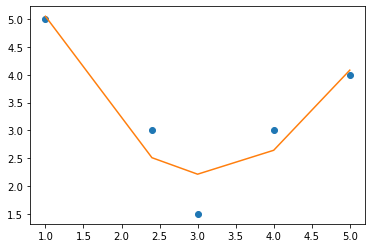

In [196]:
plt.plot(x, y, 'o')
plt.plot(x, model.predict(X))

### Just as a kind and friendly note - This is still a Linear Regression
Now you may ask why - how? 

The thing is that, in the book, reading further, it says that **"When there are multiple features to be fit in the Linear Regression model, we will get more than one Coefficeients which are hard to represent visually but still that is the linear regression."**

So considering that discussion above, we can say that DIM > 2D feeding in the LR model will lead us to the multidimentional model i.e. multiple coefs. 

**Where does the PolynomialFeatures come?**:  
The simple answer to this is that, "when you have Single feature in the dataset and you can't get the proper fitting line, then you have to give it more features, it is where 'Polynomial' comes into play."

So when there are multiple features, then you don't need to give it polynomial, but otherwise - yes.